In [1]:
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


retail=pd.read_csv('data/OnlineRetailClean.csv', dtype={'UnitPrice':np.float32,
                                                       'CustomerID':np.int32,
                                                       'Quantity':np.int32})
retail.InvoiceDate=pd.to_datetime(retail.InvoiceDate, infer_datetime_format=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [2]:
# 우수 고객 확인 (구매 횟수 기준, 지불 금액 기준)
retail.groupby('CustomerID').count()['InvoiceNo'].sort_values(ascending=False)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
17846       1
13017       1
13099       1
13106       1
12346       1
Name: InvoiceNo, Length: 4338, dtype: int64

In [3]:
retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: CheckoutPrice, Length: 4338, dtype: float64

#### 사용자 retention 분석
- 월간 사용자 cohort를 바탕으로 월별 재구매율 분석하기
- heatmap으로 한눈에 재구매율 파악 가능

In [4]:
def get_month_as_datetime(date):
    return datetime(date.year, date.month,1)

retail['Month']=retail.InvoiceDate.apply(get_month_as_datetime)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [5]:
month_group=retail.groupby('CustomerID')['Month']
retail['MonthStarted']=month_group.transform(np.min)
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01


In [6]:
retail['MonthPassed']=(retail.Month.dt.year-retail.MonthStarted.dt.year)*12+\
(retail.Month.dt.month-retail.MonthStarted.dt.month)
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,4
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,4
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397883,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,4


In [7]:
def get_unique_no(x):
    return len(np.unique(x))

cohort_group=retail.groupby(['MonthStarted','MonthPassed'])
cohort_df=cohort_group['CustomerID'].apply(get_unique_no).reset_index()
cohort_df.head()

,MonthStarted,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321


In [8]:
cohort_df=cohort_df.pivot(index='MonthStarted', columns='MonthPassed')
cohort_df.head()

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN

In [9]:
customer_cohort=cohort_df.div(cohort_df.iloc[:,0], axis=0)*100
customer_cohort=customer_cohort.round(decimals=2)
customer_cohort.index

DatetimeIndex(['2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01'],
              dtype='datetime64[ns]', name='MonthStarted', freq=None)

<AxesSubplot:xlabel='None-MonthPassed', ylabel='MonthStarted'>

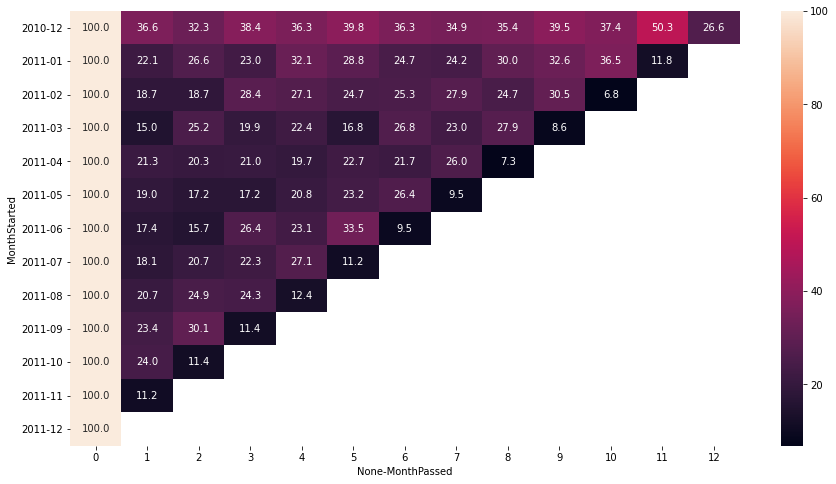

In [10]:
xticks=range(0,13)
yticks=['2010-12', '2011-01', '2011-02', '2011-03',
               '2011-04', '2011-05', '2011-06', '2011-07',
               '2011-08', '2011-09', '2011-10', '2011-11',
               '2011-12']

plt.figure(figsize=(15, 8))
sns.heatmap(customer_cohort, annot=True, xticklabels=xticks, yticklabels=yticks, fmt='.1f')

#### 쿠폰 발송을 할 때, Push를 언제 보내는게 좋을까?
- 데이터를 파악
- 가설 제시
- 가설 검증
- 1~3 반복

In [13]:
order_by_hour=retail.set_index('InvoiceDate').groupby(lambda date : date.hour).count()['InvoiceNo']
order_by_hour

InvoiceDate
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: InvoiceNo, dtype: int64

In [30]:
# 그래프 그리기 함수
COLORS=sns.color_palette()
def plot_bar(data, xlabel, ylabel, title, color=COLORS[-1], figsize=(20,10), rotation=60):
    plot=data.plot(kind='bar', figsize=figsize, color=color)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.ticklabel_format(axis='y',style='plain')
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=data.index, rotation=rotation)

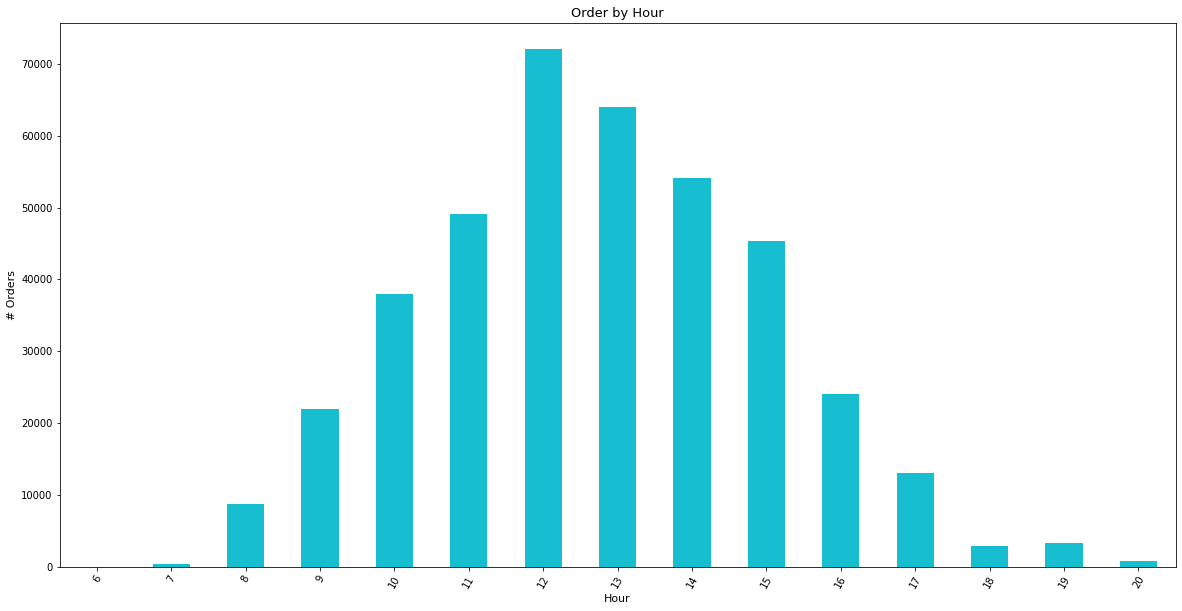

In [31]:
plot_bar(order_by_hour, 'Hour', '# Orders','Order by Hour')

In [32]:
def half_an_hour(date):
    H=str(date.hour)
    if date.hour<10:
        H='0'+H
    
    M=':00'
    if date.minute>=30:
        M=':30'

    return H+M
    

order_by_hour_half=retail.set_index('InvoiceDate').groupby(half_an_hour).count()['InvoiceNo']
order_by_hour_half

InvoiceDate
06:00        1
07:30      379
08:00     2993
08:30     5697
09:00     9012
09:30    12932
10:00    16469
10:30    21528
11:00    17799
11:30    31285
12:00    36156
12:30    35909
13:00    30094
13:30    33932
14:00    25864
14:30    28254
15:00    23746
15:30    21623
16:00    13952
16:30    10137
17:00     8783
17:30     4288
18:00     1669
18:30     1259
19:00     1506
19:30     1815
20:00      802
Name: InvoiceNo, dtype: int64

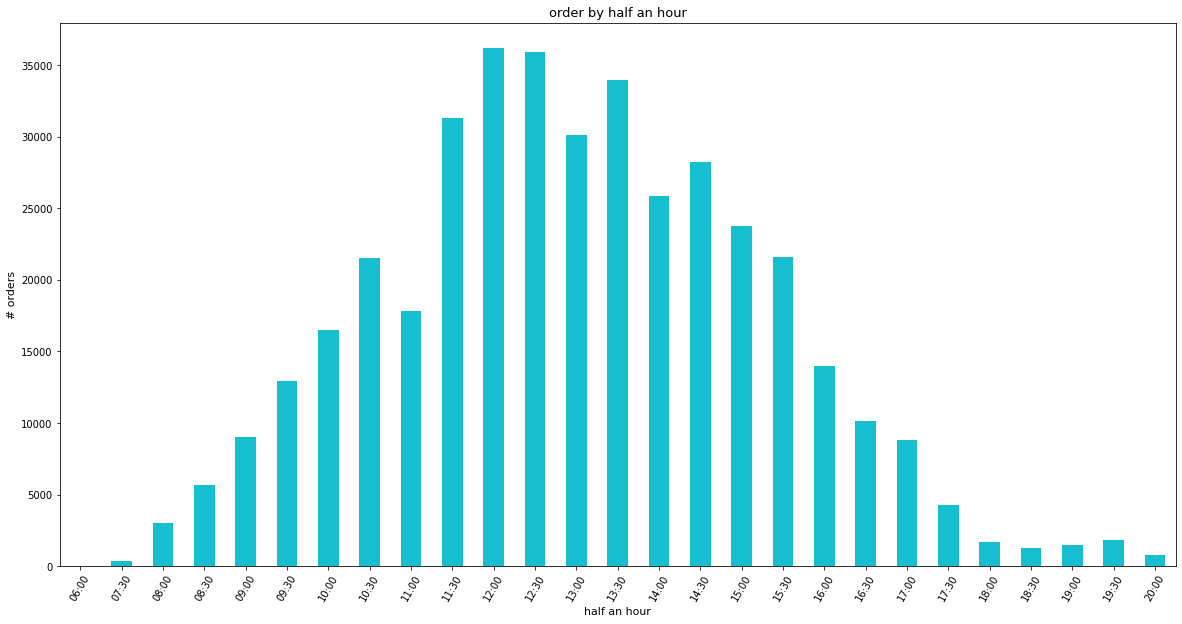

In [33]:
plot_bar(order_by_hour_half, 'half an hour','# orders','order by half an hour')

In [34]:
order_by_hour_half/order_by_hour_half.sum()

InvoiceDate
06:00    0.000003
07:30    0.000953
08:00    0.007522
08:30    0.014318
09:00    0.022650
09:30    0.032502
10:00    0.041391
10:30    0.054106
11:00    0.044734
11:30    0.078628
12:00    0.090871
12:30    0.090250
13:00    0.075635
13:30    0.085281
14:00    0.065004
14:30    0.071011
15:00    0.059681
15:30    0.054345
16:00    0.035065
16:30    0.025477
17:00    0.022074
17:30    0.010777
18:00    0.004195
18:30    0.003164
19:00    0.003785
19:30    0.004562
20:00    0.002016
Name: InvoiceNo, dtype: float64

#### 개인화된 push notification
- 아마존을 필두로, 개인화하여 맞춤으로 사용자마다 최적의 솔루션을 찾는것이 트렌드가 됨
- 사용자별로 소비의 패턴이 다를 수 있기 때문에 가장 많이 구매한 시간대를 찾아서 해당 시간대에 쿠폰을 발송

In [36]:
# 사용자별 각 시간별 주문량 계산하기
order_count_by_hour=retail.set_index('InvoiceDate').groupby(['CustomerID',lambda date : date.hour]).count()['InvoiceNo']
order_count_by_hour

CustomerID  InvoiceDate
12346       10              1
12347       8              22
            10             24
            12             47
            13             18
                           ..
18283       15              1
            16             56
            19             87
18287       9               3
            10             67
Name: InvoiceNo, Length: 11205, dtype: int64

In [42]:
order_count_by_hour.loc[12347]

InvoiceDate
8     22
10    24
12    47
13    18
14    60
15    11
Name: InvoiceNo, dtype: int64

In [43]:
# 사용자별 최대 주문 시간 계산하기
idx=order_count_by_hour.groupby('CustomerID').idxmax() # 값이 최대인 인덱스 반환

In [45]:
result=order_count_by_hour.loc[idx]
result

CustomerID  InvoiceDate
12346       10               1
12347       14              60
12348       19              17
12349       9               73
12350       16              17
                          ... 
18280       9               10
18281       10               7
18282       13               7
18283       14             201
18287       10              67
Name: InvoiceNo, Length: 4338, dtype: int64

In [55]:
result.reset_index().groupby('InvoiceDate').groups

{7: [73, 269, 319, 344, 375, 893, 1667, 2317], 8: [46, 58, 87, 126, 172, 179, 187, 260, 278, 279, 282, 292, 306, 347, 399, 429, 496, 503, 526, 533, 549, 552, 651, 671, 747, 755, 784, 792, 800, 803, 806, 821, 838, 877, 883, 920, 944, 947, 951, 954, 1008, 1093, 1106, 1120, 1138, 1172, 1173, 1217, 1251, 1397, 1422, 1424, 1436, 1472, 1512, 1616, 1621, 1666, 1668, 1678, 1687, 1734, 1759, 1761, 1774, 1791, 1815, 1827, 1846, 1859, 1895, 1900, 1903, 1996, 2018, 2023, 2054, 2085, 2108, 2117, 2167, 2172, 2253, 2380, 2383, 2403, 2404, 2417, 2427, 2462, 2464, 2643, 2749, 2776, 2781, 2896, 2936, 2949, 3021, 3130, ...], 9: [3, 9, 26, 30, 33, 35, 37, 48, 60, 66, 75, 84, 86, 90, 100, 106, 107, 121, 127, 135, 138, 142, 144, 146, 154, 159, 181, 199, 230, 240, 264, 265, 267, 277, 280, 286, 294, 298, 328, 333, 336, 342, 343, 352, 362, 366, 385, 402, 421, 459, 470, 475, 478, 482, 483, 509, 517, 519, 574, 603, 615, 630, 636, 642, 644, 691, 701, 706, 707, 746, 749, 752, 764, 770, 781, 783, 818, 825, 829, 844